# Задание по курсу "Анализ данных"

### Разбить заданный датасет на 2 кластера, используя агломеративный иерархический метод и метод к-средних. 

### Методом главных компонент построить два новых признака для описания объектов из датасета и кластеризовать данные по этим двум признакам на два кластера (любым методом). Сравнить качество кластеризации. 

In [1]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('data/beauty.csv')
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      1260 non-null   float64
 1   exper     1260 non-null   int64  
 2   union     1260 non-null   int64  
 3   goodhlth  1260 non-null   int64  
 4   black     1260 non-null   int64  
 5   female    1260 non-null   int64  
 6   married   1260 non-null   int64  
 7   service   1260 non-null   int64  
 8   educ      1260 non-null   int64  
 9   looks     1260 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 98.6 KB


In [4]:
df.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


In [5]:
df.wage.value_counts()

wage
3.75     36
7.69     32
4.81     28
1.98     24
7.96     21
         ..
6.66      1
3.58      1
1.63      1
11.06     1
1.61      1
Name: count, Length: 520, dtype: int64

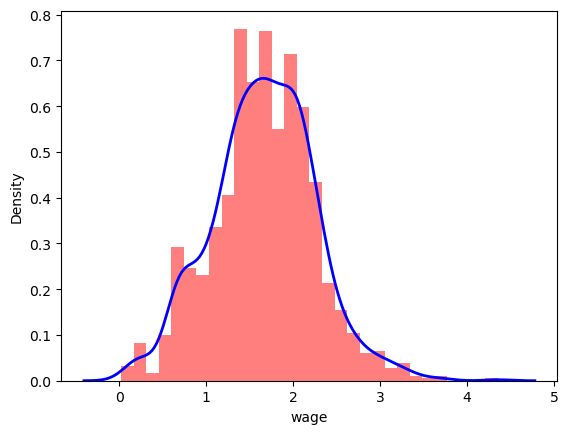

In [6]:
log_values = df.wage.apply(np.log)

plt.hist(log_values, bins=30, color='red', alpha=0.5, density=True)

sns.kdeplot(log_values, color='blue', linewidth=2);

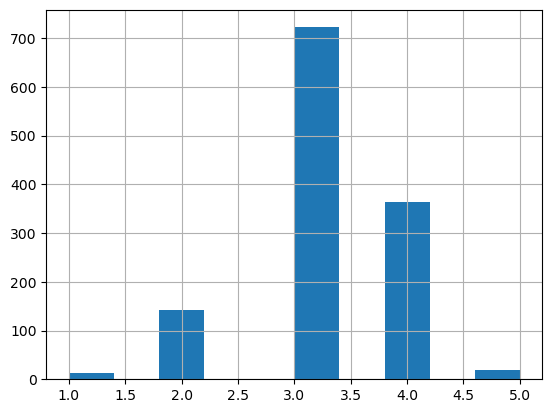

In [7]:
df.looks.hist();

In [8]:
df.female.value_counts()

female
0    824
1    436
Name: count, dtype: int64

In [9]:
df.married.value_counts()

married
1    871
0    389
Name: count, dtype: int64

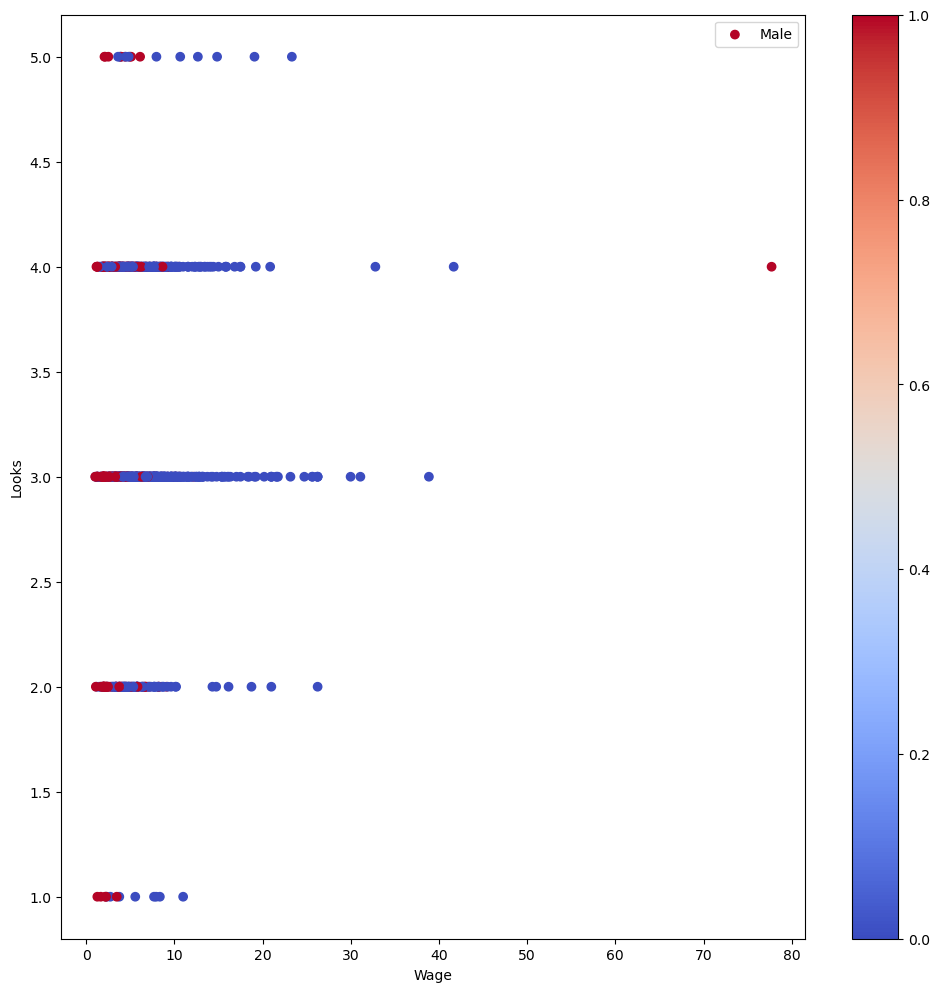

In [10]:
plt.figure(figsize=(12,12))
plt.scatter(df.wage, df.looks, c=df.female, cmap='coolwarm');
plt.legend(['Male', 'Female']);
plt.colorbar();
plt.xlabel('Wage');
plt.ylabel('Looks');

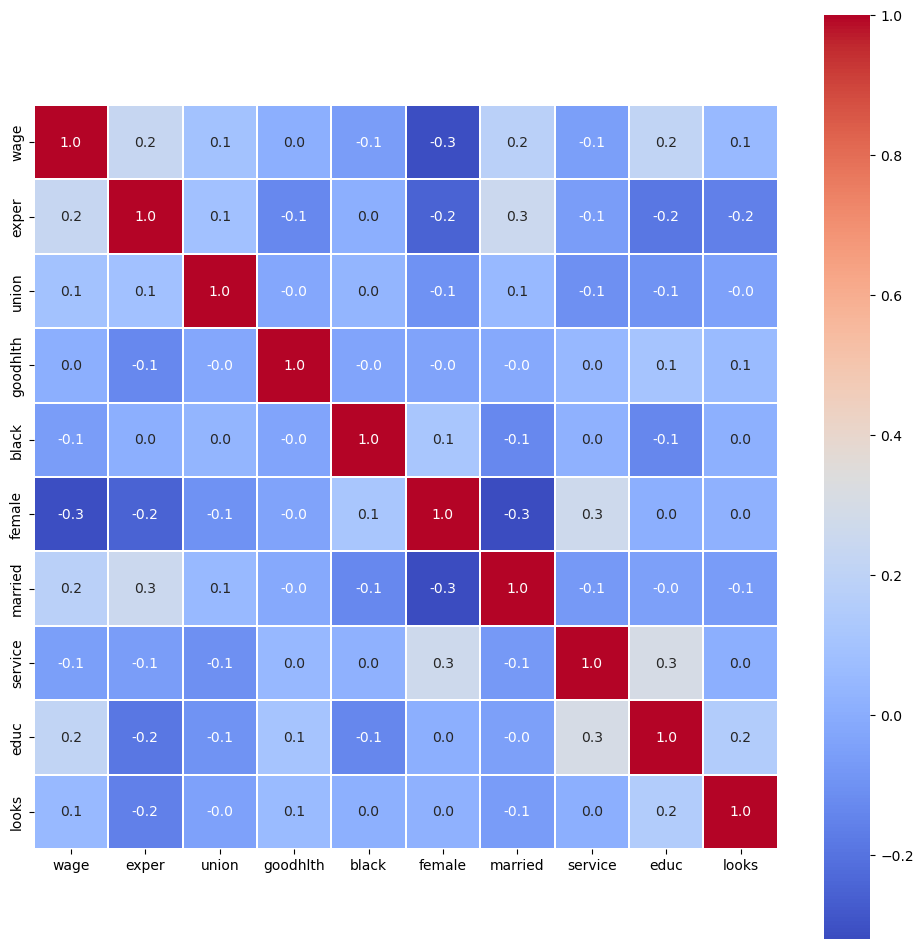

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

plt.subplots(figsize=(12, 12))
sns.heatmap(correlation_matrix, square=True,
            annot=True, fmt='.1f', linewidths=0.1, cmap='coolwarm');

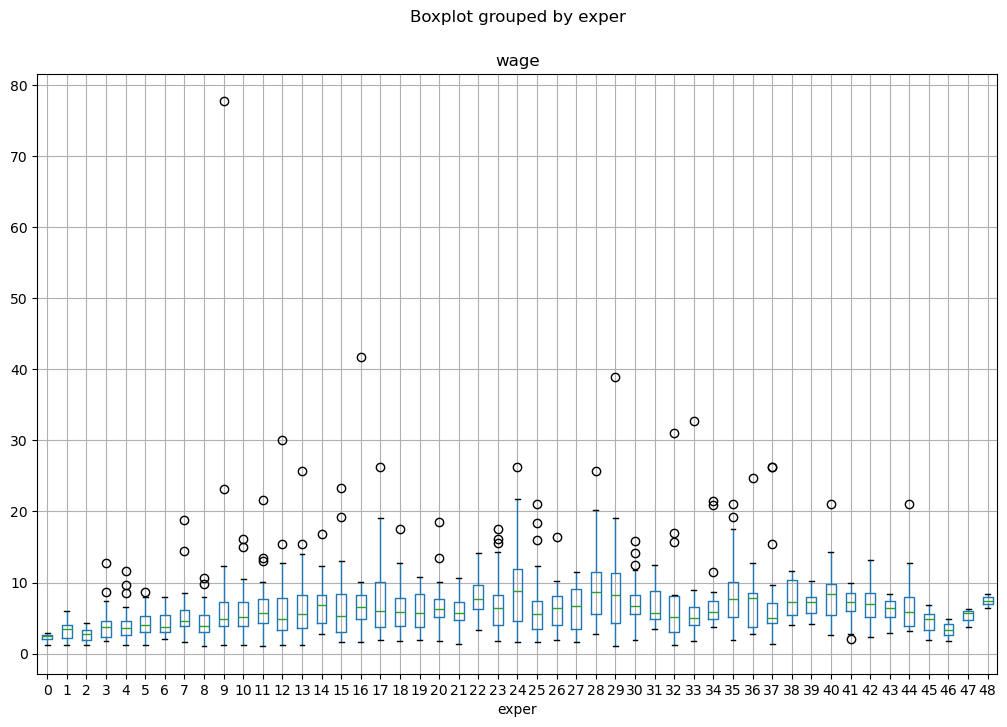

In [12]:
df.boxplot(column='wage', by='exper', figsize=(12,8));

### Start clustering with create 2 features for clustering with PCA

In [ ]:
# Выбор признаков для кластеризации
# features = [
#     'wage', 'exper', 'union', 'goodhlth', 
#    'black', 'female', 'married', 'service', 'educ', 'looks'
# ]
features = ['wage','female', 'looks']
# Нормализация
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

In [14]:
data_scaled.head()

,wage,female,looks
0,0.061408,1.0,0.75
1,0.042503,1.0,0.50
2,0.090482,1.0,0.75
3,0.137549,0.0,0.50
4,0.135593,0.0,0.50


Text(0.5, 1.0, 'Correlation Matrix')

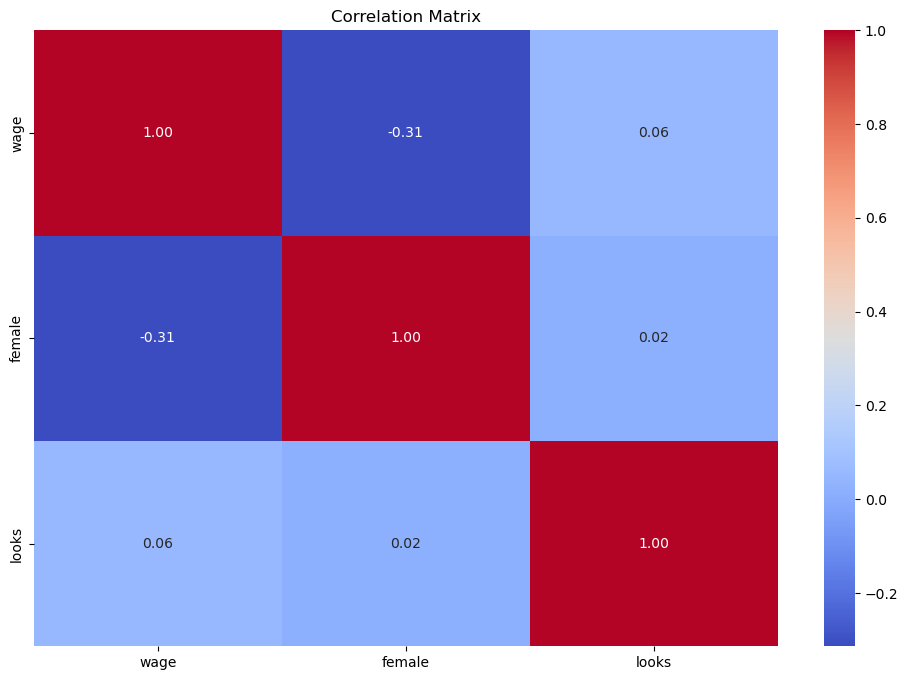

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_scaled.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")

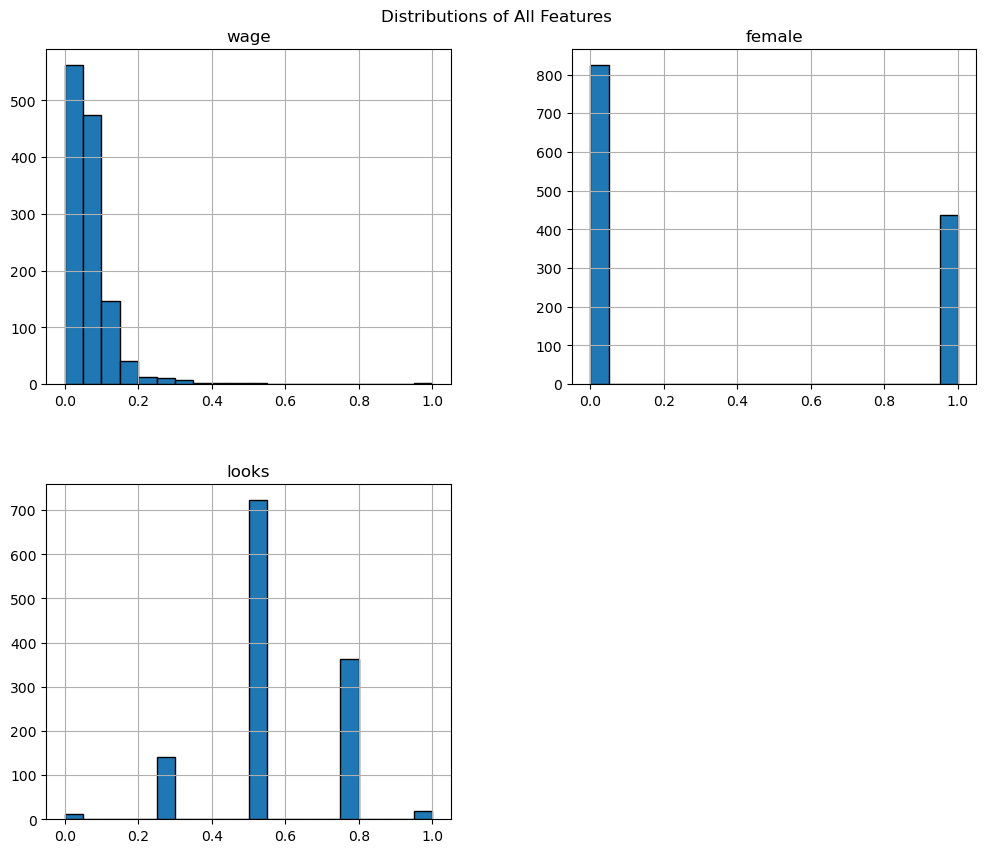

In [16]:
data_scaled.hist(bins=20, figsize=(12, 10), edgecolor='black')
plt.suptitle("Distributions of All Features", y=0.92);

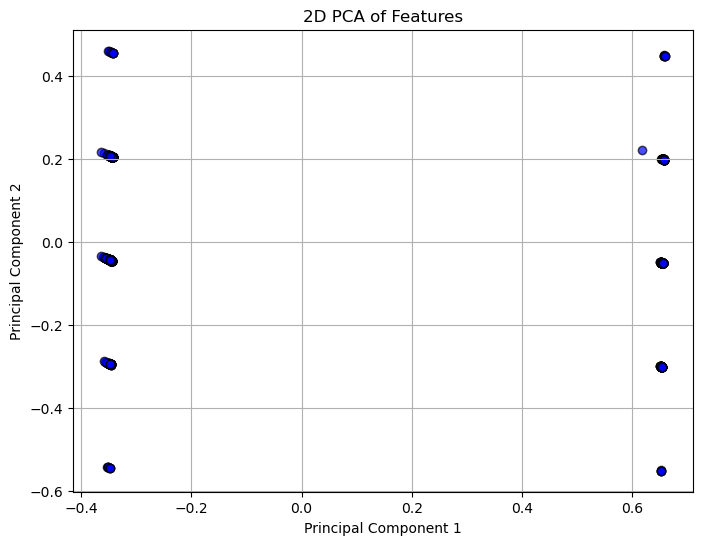

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c='blue', edgecolor='k', alpha=0.7)
plt.title("2D PCA of Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()


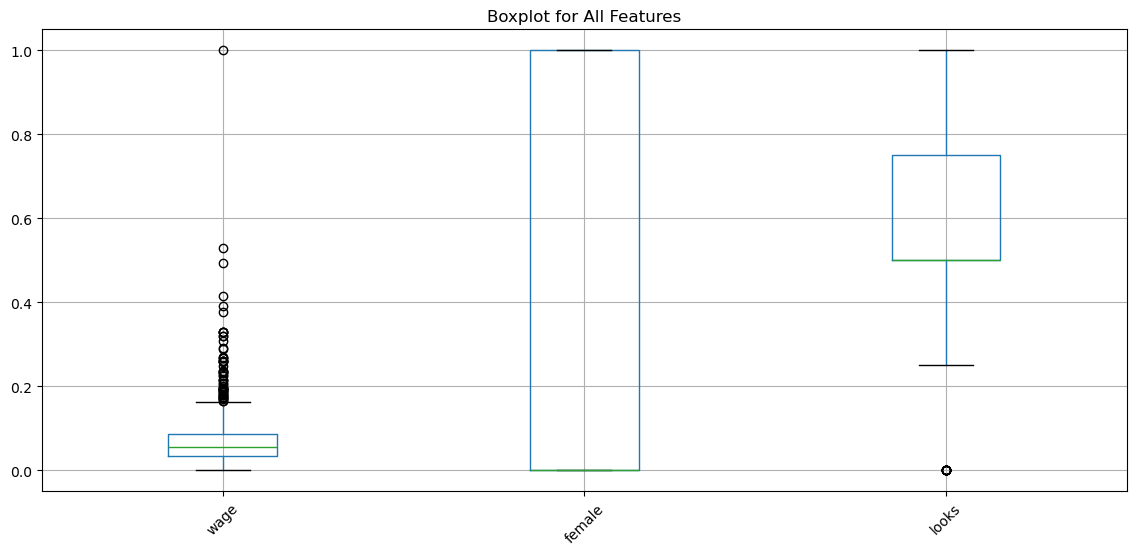

In [ ]:
plt.figure(figsize=(14, 6))
data_scaled.boxplot()
plt.title("Boxplot for All Features")
plt.xticks(rotation=45)

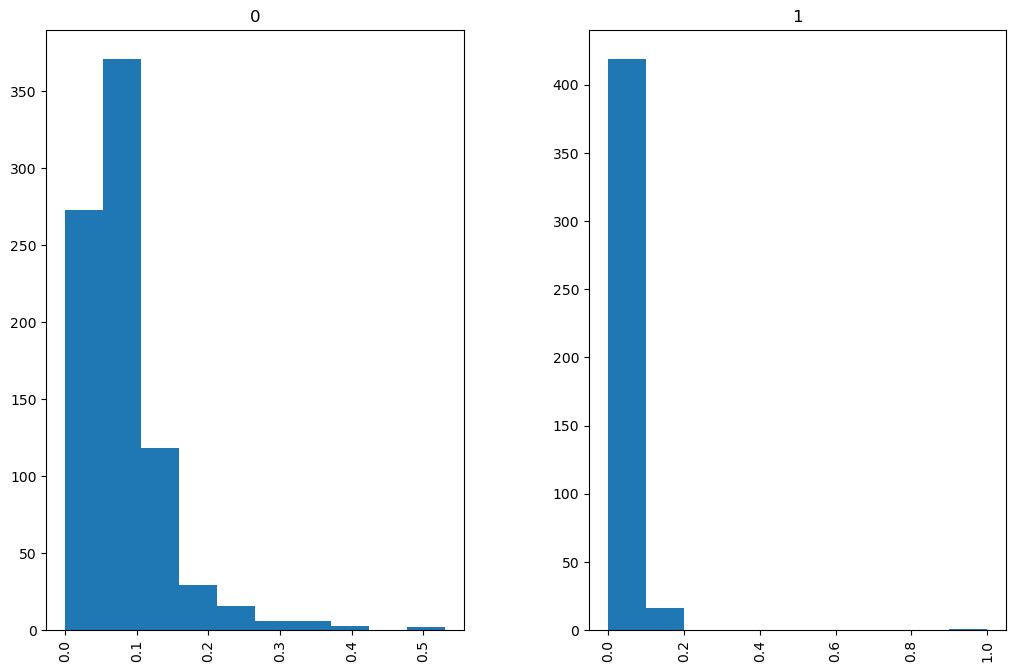

In [27]:
data_scaled.wage.hist(by=df['Cluster_Hierarchical'], figsize=(12,8));

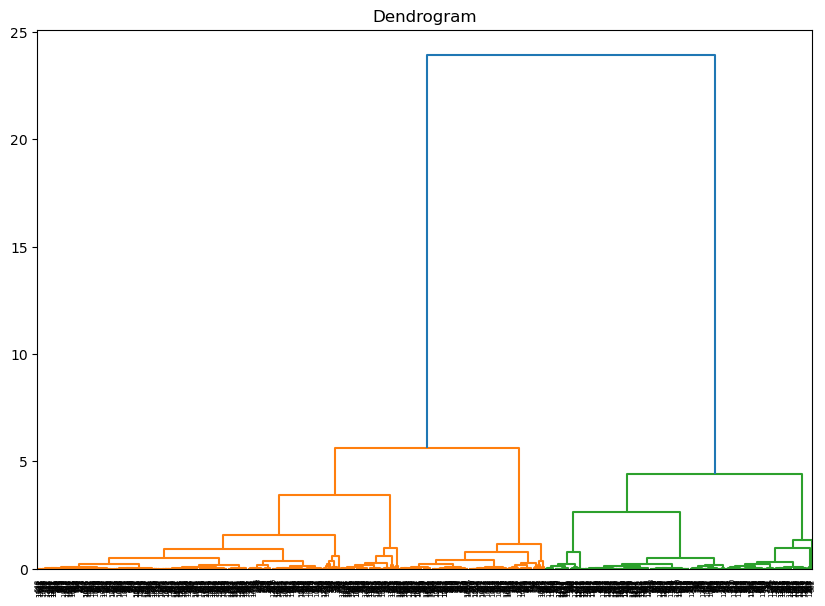

In [ ]:
# Построение дендрограммы
linked = linkage(data_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram')


In [30]:
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
df['Cluster_Hierarchical'] = cluster.fit_predict(data_scaled)

In [29]:
# Сравнение средних значений признаков в кластерах
df.groupby('Cluster_Hierarchical')[features].mean()

,wage,female,looks
Cluster_Hierarchical,,,
0,7.368823,0.0,3.177184
1,4.299358,1.0,3.201835


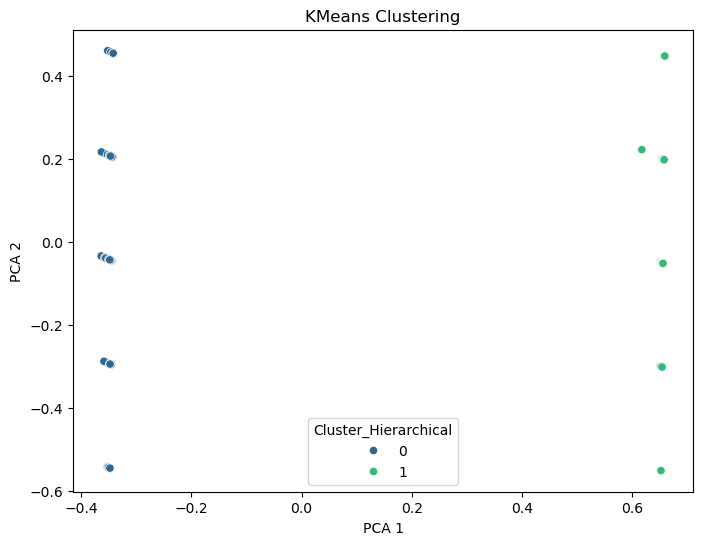

In [22]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=df['Cluster_Hierarchical'], palette='viridis')
plt.title('KMeans Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2');

### Силуетный коэффициент измеряет, насколько хорошо кластеризованы объекты. Он принимает значения от -1 до 1, где:

* 1 означает, что точки хорошо разделены;
* 0 указывает на то, что кластеры пересекаются;
* -1 означает, что точки могут быть неправильно отнесены к кластерам.

In [23]:
from sklearn.metrics import silhouette_score

# Оценка кластеризации с использованием силуэта
silhouette_avg = silhouette_score(data_scaled, df['Cluster_Hierarchical'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.8089116735301355


### Индекс Дэвиса-Боулдина оценивает среднюю схожесть между каждым кластером и его наиболее похожим кластером. Чем меньше значение, тем лучше.

In [24]:
from sklearn.metrics import davies_bouldin_score

# Оценка кластеризации с использованием индекса Дэвиса-Боулдина
db_score = davies_bouldin_score(data_scaled, df['Cluster_Hierarchical'])
print(f"Davies-Bouldin Index: {db_score}")


Davies-Bouldin Index: 0.28732910384588267


In [25]:
# KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(data_scaled)
print(f"Inertia (KMeans): {kmeans.inertia_}")

Inertia (KMeans): 41.090096213513135


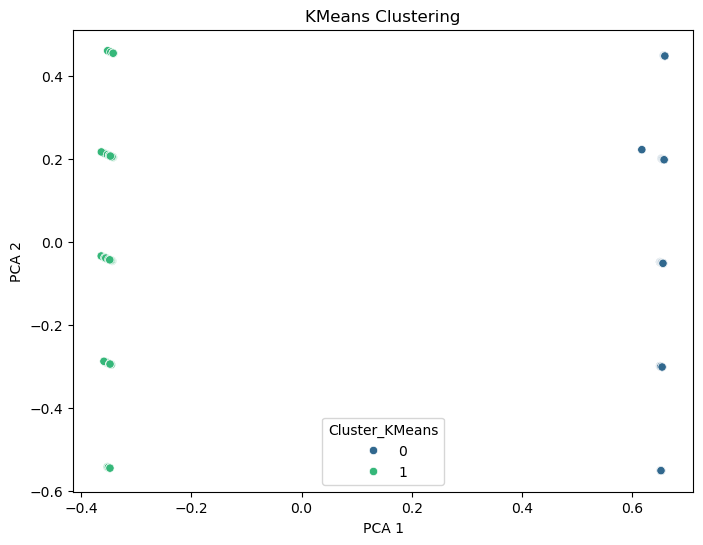

In [26]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=df['Cluster_KMeans'], palette='viridis')
plt.title('KMeans Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()